# 2. Learning From Data

## 2.1

In [2]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . model_selection import train_test_split
from sklearn . linear_model import LinearRegression
# Generate 100 samples
n_samples = 100
# Generate X values ( uniformly distributed between 0 and 10)
X = 10 * np . random . rand ( n_samples , 1)
# Generate epsilon values ( normally distributed with mean 0 and standard deviation 15)
epsilon = np . random . normal (0 , 15 , n_samples )
# Generate Y values using the model Y = 3 + 3X + epsilon
Y = 3 + 2 * X + epsilon [: , np . newaxis ]

## 2.2

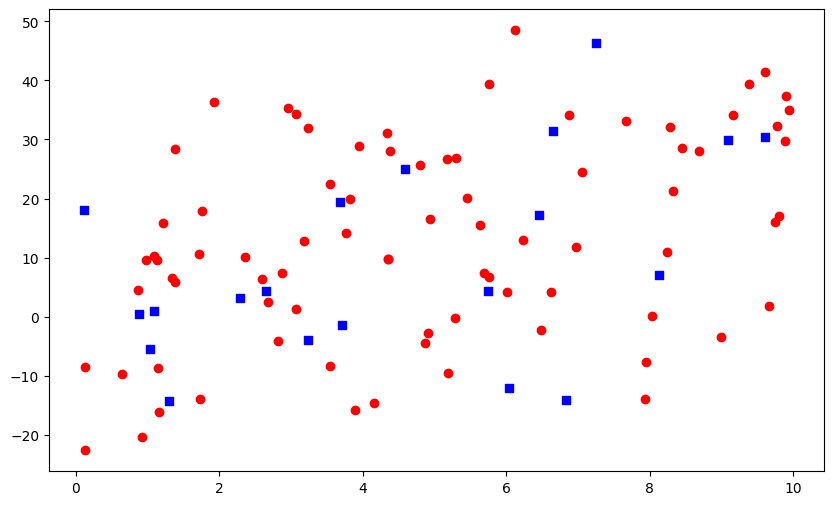

In [10]:
r = np . random . randint (104)
# Split the data into training and test sets (80% train ,20% test )
X_train , X_test , Y_train , Y_test = train_test_split (X , Y ,test_size =0.2 , random_state = r )
# Plot the data points
plt . figure ( figsize =(10 , 6) )
plt . scatter ( X_train , Y_train , alpha =1 , marker ='o', color ='red', label ='Training Data ')
plt . scatter ( X_test , Y_test , alpha =1 , marker ='s', color ='blue', label ='Testing Data ')
plt . show ()


## 2.3

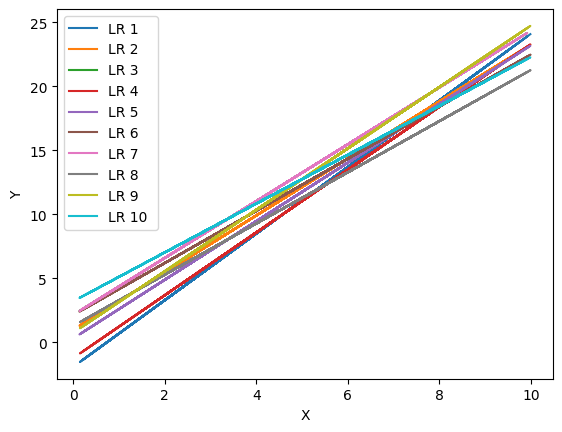

In [5]:
for i in range (10) : # Plotting 10 different instances
    X_train , X_test , Y_train , Y_test = train_test_split (X ,Y , test_size =0.2 , random_state = np.random.randint(104))
    model = LinearRegression ()
    model . fit ( X_train , Y_train )
    Y_pred_train = model . predict ( X_train )
    plt . plot ( X_train , Y_pred_train , label = f'LR {i+1} ')
plt . xlabel ('X')
plt . ylabel ('Y')
plt . legend ()
plt . show ()

## 2.4

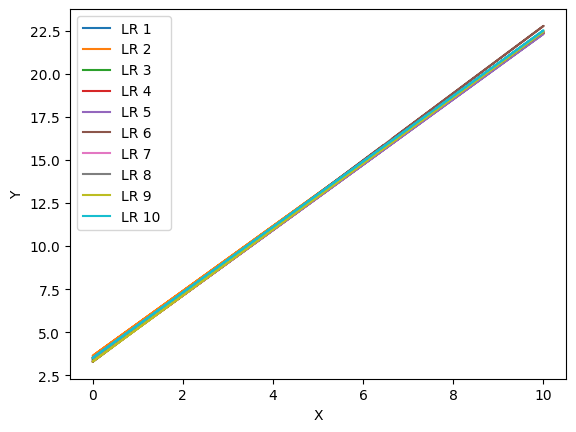

In [7]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . model_selection import train_test_split
from sklearn . linear_model import LinearRegression
# Generate 10000 samples
n_samples = 10000
# Generate X values ( uniformly distributed between 0 and 10)
X = 10 * np . random . rand ( n_samples , 1)
# Generate epsilon values ( normally distributed with mean 0 and standard deviation 15)
epsilon = np . random . normal (0 , 15 , n_samples )
# Generate Y values using the model Y = 3 + 3X + epsilon
Y = 3 + 2 * X + epsilon [: , np . newaxis ]

for i in range (10) : # Plotting 10 different instances
    X_train , X_test , Y_train , Y_test = train_test_split (X ,Y , test_size =0.2 , random_state = np.random.randint(104))
    model = LinearRegression ()
    model . fit ( X_train , Y_train )
    Y_pred_train = model . predict ( X_train )
    plt . plot ( X_train , Y_pred_train , label = f'LR {i+1} ')
plt . xlabel ('X')
plt . ylabel ('Y')
plt . legend ()
plt . show ()

# 3 Linear regression on real world data

In [14]:
!pip install ucimlrepo


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 3.2

In [24]:
# If package not installed , install it using pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
# fetch dataset
infrared_thermography_temperature = fetch_ucirepo (id =925)
# data (as pandas dataframes )
X = infrared_thermography_temperature . data . features
y = infrared_thermography_temperature . data . targets
# metadata
print ( infrared_thermography_temperature . metadata )
# variable information
print ( infrared_thermography_temperature . variables )

{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

## 3.7

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
from ucimlrepo import fetch_ucirepo

infrared_thermography_temperature = fetch_ucirepo(id=925)
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets

# Selecting 'aveOralM' as the dependent feature and 'Age', 'T_atm', 'Humidity', 'Distance', 'T_RC_Max1' as independent features
X = X[['Age', 'T_atm', 'Humidity', 'Distance', 'T_RC_Max1']]
y = y['aveOralM']

# One-hot encode 'Age' feature
if X['Age'].dtype == 'object':
    X = pd.get_dummies(X, columns=['Age'])

# Drop rows with missing values
X.dropna(inplace=True)
y = y[X.index]  # Align the target 'y' with the filtered 'X'

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Estimate the coefficients
coefficients = model.coef_
intercept = model.intercept_

# List the estimated coefficients
coefficients_list = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

print(f"Intercept: {intercept}")
print(coefficients_list)




Intercept: 11.094477782920972
      Feature  Coefficient
0       T_atm    -0.053396
1    Humidity     0.001499
2    Distance     0.002541
3   T_RC_Max1     0.765347
4   Age_18-20    -0.165189
5   Age_21-25    -0.117728
6   Age_21-30     0.002035
7   Age_26-30    -0.106107
8   Age_31-40    -0.156186
9   Age_41-50     0.077870
10  Age_51-60    -0.060913
11    Age_>60     0.526218


## 3.9

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
from ucimlrepo import fetch_ucirepo

infrared_thermography_temperature = fetch_ucirepo(id=925)
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets

# Selecting the specified features and the dependent feature
X = X[['T_OR1', 'T_OR_Max1', 'T_FHC_Max1', 'T_FH_Max1']]
y = y['aveOralM']

# Drop rows with missing values
data = pd.concat([X, y], axis=1)
data = data.dropna()

# Separate the features and target variable after dropping NaNs
X_clean = data[['T_OR1', 'T_OR_Max1', 'T_FHC_Max1', 'T_FH_Max1']]
y_clean = data['aveOralM']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Estimate the coefficients
coefficients = model.coef_
intercept = model.intercept_

# List the estimated coefficients
coefficients_list = pd.DataFrame({
    'Feature': ['T_OR1', 'T_OR_Max1', 'T_FHC_Max1', 'T_FH_Max1'],
    'Coefficient': coefficients
})

print(f"Intercept: {intercept}")
print(coefficients_list)


Intercept: 7.0368797635459615
      Feature  Coefficient
0       T_OR1     0.091997
1   T_OR_Max1     0.464070
2  T_FHC_Max1    -0.087332
3   T_FH_Max1     0.370886


## 3.10

In [12]:
import numpy as np


y_hat =model.predict(X_train)

RSS = np.sum((y_hat-y_train)**2)

N =len(y_train)

MSE = RSS/N

RSE = np.sqrt(1/(N-2)*RSS)

TSS = np.sum((y_train-np.mean(y_train))**2)

R2 =(1-(RSS/TSS))

R2_ =model.score(X_train,y_train)

print(f"RSS: {RSS}")
print(f"RSE: {RSE}")
print(f"MSE: {MSE}")
print(f"R^2(directly calculated): {R2}")
print(f"R^2(from sklearn): {R2_}")


RSS: 79.02804487558424
RSE: 0.3115863447195744
MSE: 0.09684809421027481
R^2(directly calculated): 0.643312635118277
R^2(from sklearn): 0.643312635118277


In [16]:
from scipy import stats

N = len(X_train)

feature_list = ['T_OR1', 'T_OR_Max1', 'T_FHC_Max1', 'T_FH_Max1']

d = len(feature_list)

sigma2 =RSS/(N-d-1)

# Standard error
SE_list =[]
for i in feature_list:
    SE = np.sqrt(sigma2/np.sum((X_train[i]-np.mean(X_train[i]))**2))
    SE_list.append(SE)

# t value
t_list =[]
for i ,se in enumerate(SE_list):
    t = coefficients[i] /se
    t_list.append(t)

p_list =[]
for t in t_list:
    p = 2*stats.t.sf(np.abs(t),N-2)
    p_list.append(p)

results = pd.DataFrame({
    'Feature': ['T_OR1', 'T_OR_Max1', 'T_FHC_Max1', 'T_FH_Max1'],
    'Coefficient': coefficients,
    'Standard Error': SE_list,
    't-statistic': t_list,
    'p-value': p_list
})

print(results)



      Feature  Coefficient  Standard Error  t-statistic       p-value
0       T_OR1     0.091997        0.019513     4.714745  2.846581e-06
1   T_OR_Max1     0.464070        0.019513    23.782064  2.430323e-95
2  T_FHC_Max1    -0.087332        0.018743    -4.659507  3.701784e-06
3   T_FH_Max1     0.370886        0.020652    17.958785  5.287498e-61


# 4 Performance evaluation of Linear regression

## 4.2

In [19]:
# Model A

N_A = 10000 
SSE_A = 9
d_A = 2 # no of independent features

RSE_A = np.sqrt(SSE_A/(N_A - d_A -1))

# Model B

N_B = 10000
SSE_B = 2
d_B = 4 # no of independent features

RSE_B = np.sqrt(SSE_B/(N_B - d_B -1))

print(f"RSE(model A): {RSE_A}")
print(f"RSE(model B): {RSE_B}")

RSE(model A): 0.03000450101275319
RSE(model B): 0.014145672484014767


## 4.3

In [22]:
# Model A
TSS_A = 90
R2_A = 1-(SSE_A/TSS_A)

# Model B
TSS_B = 10
R2_B = 1-(SSE_B/TSS_B)

print(f"R^2(model A): {R2_A}")
print(f"R^2(model B): {R2_B}")


R^2(model A): 0.9
R^2(model B): 0.8


# 5 Linear regression impact on outliers


## 5.3

In [21]:
import numpy as np
import pandas as pd

ri1= 40
ai_list=[2.5,25,100]
L1_list1 = []
L2_list1 = []


for ai in ai_list:
    # L1(w)
    L1 = ri1**2 / (ri1**2 + ai**2)
    # L2(w)
    L2 = 1- np.exp((-2*ri1)/ai)

    L1_list1.append(L1)
    L2_list1.append(L2)

results1 = pd.DataFrame({
    'a(when ri=40)': [2.5,25,100],
    'L1 values': L1_list1,
    'L2 values': L2_list1
})

ri2= 100
L1_list2 = []
L2_list2 = []


for ai in ai_list:
    # L1(w)
    L1 = ri2**2 / (ri2**2 + ai**2)
    # L2(w)
    L2 = 1- np.exp((-2*ri2)/ai)

    L1_list2.append(L1)
    L2_list2.append(L2)

results2 = pd.DataFrame({
    'a(when ri=100)': [2.5,25,100],
    'L1 values': L1_list2,
    'L2 values': L2_list2
})

print(results1)
print('\n')
print(results2)



   a(when ri=40)  L1 values  L2 values
0            2.5   0.996109   1.000000
1           25.0   0.719101   0.959238
2          100.0   0.137931   0.550671


   a(when ri=100)  L1 values  L2 values
0             2.5   0.999375   1.000000
1            25.0   0.941176   0.999665
2           100.0   0.500000   0.864665
